In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local

sidm_path = str(os.getcwd()).split("/sidm")[0]
# sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
from sidm.tools import llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm
import coffea.util
import numpy as np

In [2]:
samples = [
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_200GeV_5p0GeV_200p0mm",
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_0p25GeV_2p0mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_200GeV_5p0GeV_200p0mm",
    "4Mu_1000GeV_0p25GeV_0p002mm",
    "4Mu_1000GeV_0p25GeV_2p0mm",
    "DYJetsToMuMu_M10to50", 
    "DYJetsToMuMu_M50",    
    "TTJets",
    "QCD_Pt120To170",
    "QCD_Pt170To300",
    "QCD_Pt300To470",
    "QCD_Pt470To600",
    "QCD_Pt600To800",
    "QCD_Pt800To1000",
    "QCD_Pt1000",
]

In [3]:
# runner = processor.Runner(
#     # executor=processor.DaskExecutor(client=client),
#     # executor=processor.IterativeExecutor(),
#     schema=llpnanoaodschema.LLPNanoAODSchema,
#     skipbadfiles=True
# )

channels = [
    "baseNoLj_basic", "baseNoLj_all", "base", "base_preCC", "base_CC", "base_CC_isosel", "base_CC_nonisosel",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["matched_jet_base", "fraction_base", "isolation_base", "energy_transfer_base", "muon_crosscleaning_base"],
    unweighted_hist=False,
)

# out = {}
# for i, sample in enumerate(samples):

#     print(f"Processing {sample}")
#     fileset_one_sample = {samples[i]:fileset.get(samples[i])}
    
#     output = runner.run(fileset_one_sample, treename='Events', processor_instance=p)

#     #Add this sample's output to the out variable
#     out[sample] = output["out"][sample]

#     ##Save output to a file!!
#     out_file_name = "output_" + sample + ".coffea"
#     coffea.util.save(output,out_file_name)

In [4]:
#First check if there is already an out dictionary
try:
    out
    print("The _out_ dictionary already exists; will use what is saved in memory if possible")
except NameError:
    print("WARNING! No processor output stored in the kernel's memory. Will try to load pickled coffea file for each sample instead")
    out = {}

#For each sample, try to use the data in memory if possible; if not try to load the file
#If those both fail, then raise an error and skip it
for sample in samples:
    if sample in out:
        print(f"{sample} already found in memory; not loading file")
    else:
        print(f"Loading file for sample {sample}")
        filename = "output_" + sample + ".coffea"
        try: 
            output = coffea.util.load(filename)
            print("Successfully opened file")        
            out[sample] = output["out"][sample]
        except Exception:
            out[sample] = output[sample]
            # print("**** ERROR! File not found. Check the file name, or run the processor again and save the output to a pickle file using coffea.util.save")

WARNING! No processor output stored in the kernel's memory. Will try to load pickled coffea file for each sample instead
Loading file for sample 2Mu2E_200GeV_5p0GeV_0p2mm
Successfully opened file
Loading file for sample 2Mu2E_200GeV_5p0GeV_200p0mm
Successfully opened file
Loading file for sample 2Mu2E_1000GeV_0p25GeV_0p002mm
Successfully opened file
Loading file for sample 2Mu2E_1000GeV_0p25GeV_2p0mm
Successfully opened file
Loading file for sample 4Mu_200GeV_5p0GeV_0p2mm
Successfully opened file
Loading file for sample 4Mu_200GeV_5p0GeV_200p0mm
Successfully opened file
Loading file for sample 4Mu_1000GeV_0p25GeV_0p002mm
Successfully opened file
Loading file for sample 4Mu_1000GeV_0p25GeV_2p0mm
Successfully opened file
Loading file for sample DYJetsToMuMu_M10to50
Successfully opened file
Loading file for sample DYJetsToMuMu_M50
Successfully opened file
Loading file for sample TTJets
Successfully opened file
Loading file for sample QCD_Pt170To300
Successfully opened file
Loading file fo

In [5]:
channels = ["base_preCC", "base_CC", "base_CC_isosel", "base_CC_nonisosel"]

In [6]:
samples_2mu = [
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_200GeV_5p0GeV_200p0mm",
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_0p25GeV_2p0mm",
]

samples_4mu = [
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_200GeV_5p0GeV_200p0mm",
    "4Mu_1000GeV_0p25GeV_0p002mm",
    "4Mu_1000GeV_0p25GeV_2p0mm",
]

samples_bkg = [
    "DYJetsToMuMu_M10to50", 
    "DYJetsToMuMu_M50",    
    "TTJets",
    # "QCD_Pt120To170",
    "QCD_Pt170To300",
    "QCD_Pt300To470",
    "QCD_Pt470To600",
    "QCD_Pt600To800",
    # "QCD_Pt800To1000",
    "QCD_Pt1000",
]

In [9]:
colors = ["r", "b", "darkorange", "darkgreen", "deepskyblue", "purple", "pink", "black"]

In [9]:
samples = [
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    # "2Mu2E_200GeV_5p0GeV_200p0mm",
    # "2Mu2E_1000GeV_0p25GeV_0p002mm",
    # "2Mu2E_1000GeV_0p25GeV_2p0mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    # "4Mu_200GeV_5p0GeV_200p0mm",
    # "4Mu_1000GeV_0p25GeV_0p002mm",
    # "4Mu_1000GeV_0p25GeV_2p0mm",
    # "DYJetsToMuMu_M10to50", 
    "DYJetsToMuMu_M50",    
    "TTJets",
    # "QCD_Pt120To170",
    # "QCD_Pt170To300",
    "QCD_Pt300To470",
    # "QCD_Pt470To600",
    # "QCD_Pt600To800",
    # "QCD_Pt800To1000",
    "QCD_Pt1000",
]

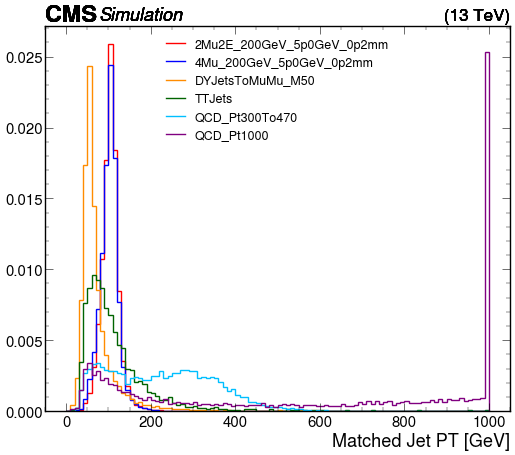

In [41]:
plt.subplots(1,1,figsize=(12,10))

plt.subplot(1,1,1)
for i, sample in enumerate(samples):
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[4], :], density=True, color=colors[i], yerr=False, linewidth=2)
plt.legend(samples, loc='upper center', prop={'size': 18})

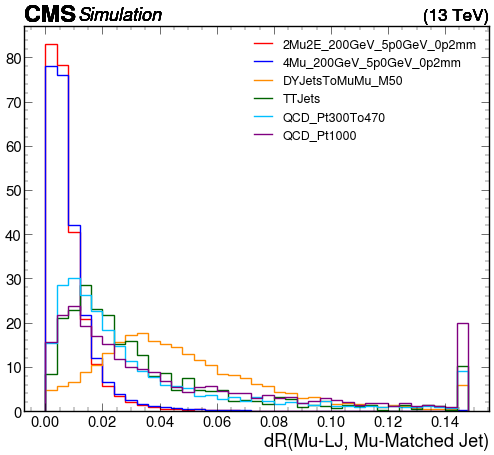

In [39]:
plt.subplots(1,1,figsize=(12,10))

plt.subplot(1,1,1)
for i, sample in enumerate(samples):
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lj_dR"][channels[4], :0.15j], density=True, color=colors[i], yerr=False, linewidth=2)
plt.legend(samples, loc=1, prop={'size': 18})

(0.0001, 0.1)

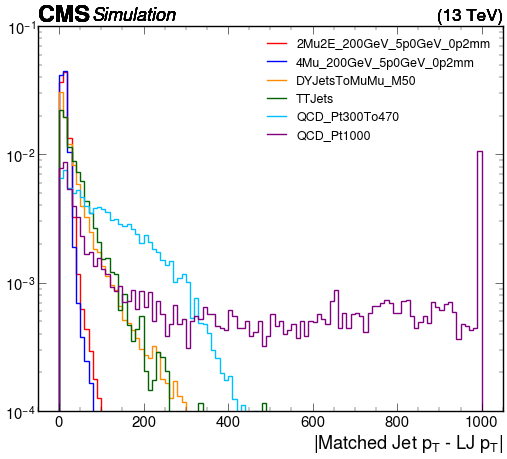

In [42]:
plt.subplots(1,1,figsize=(12,10))

plt.subplot(1,1,1)
for i, sample in enumerate(samples):
    utilities.plot(out[sample]["hists"]["dpt_matched_jet_lj_large"][channels[4], :], density=True, color=colors[i], yerr=False, linewidth=2)
plt.legend(samples, loc=1, prop={'size': 18})
plt.yscale("log")
plt.ylim(.0001,.1)

In [11]:
samples = [
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    # "2Mu2E_200GeV_5p0GeV_200p0mm",
    # "2Mu2E_1000GeV_0p25GeV_0p002mm",
    # "2Mu2E_1000GeV_0p25GeV_2p0mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    # "4Mu_200GeV_5p0GeV_200p0mm",
    # "4Mu_1000GeV_0p25GeV_0p002mm",
    # "4Mu_1000GeV_0p25GeV_2p0mm",
    # "DYJetsToMuMu_M10to50", 
    "DYJetsToMuMu_M50",    
    "TTJets",
    # "QCD_Pt120To170",
    # "QCD_Pt170To300",
    "QCD_Pt300To470",
    # "QCD_Pt470To600",
    # "QCD_Pt600To800",
    # "QCD_Pt800To1000",
    "QCD_Pt1000",
]

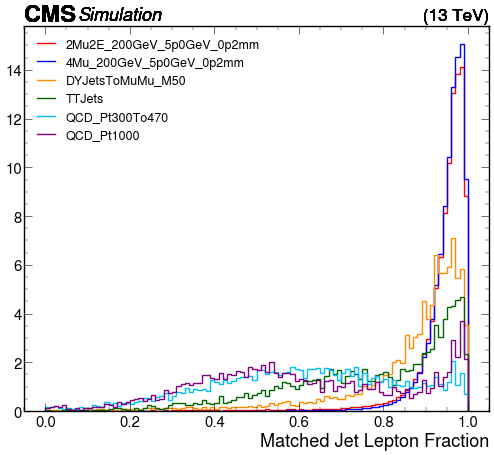

In [53]:
plt.subplots(1,1,figsize=(12,10))

plt.subplot(1,1,1)
for i, sample in enumerate(samples):
    utilities.plot(out[sample]["hists"]["matched_jet_lepfraction"][channels[4], :], density=True, color=colors[i], yerr=False, linewidth=2)
plt.legend(samples, loc=2, prop={'size': 18})
# plt.yscale("log")
# plt.ylim(.0001,.1)

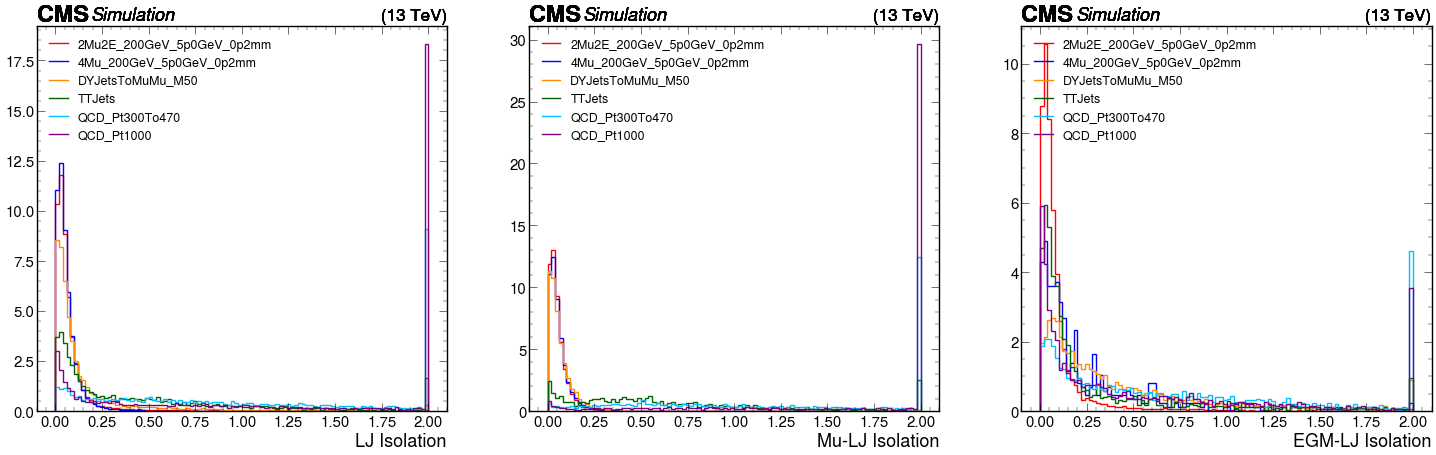

In [54]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for i, sample in enumerate(samples):
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[4], :], density=True, color=colors[i], yerr=False, linewidth=2)
plt.legend(samples, loc=2, prop={'size': 18})

plt.subplot(1,3,2)
for i, sample in enumerate(samples):
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[4], :], density=True, color=colors[i], yerr=False, linewidth=2)
plt.legend(samples, loc=2, prop={'size': 18})

plt.subplot(1,3,3)
for i, sample in enumerate(samples):
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[4], :], density=True, color=colors[i], yerr=False, linewidth=2)
plt.legend(samples, loc=2, prop={'size': 18})

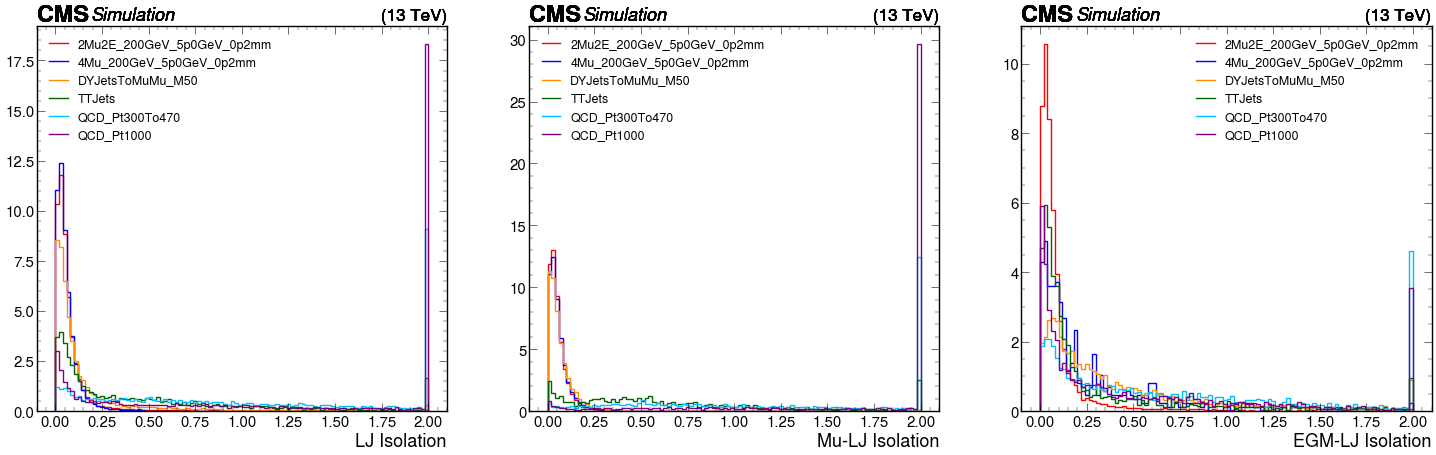

In [13]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for i, sample in enumerate(samples):
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[4], :], density=True, color=colors[i], yerr=False, linewidth=2)
plt.legend(samples, loc=2, prop={'size': 18})

plt.subplot(1,3,2)
for i, sample in enumerate(samples):
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[4], :], density=True, color=colors[i], yerr=False, linewidth=2)
plt.legend(samples, loc=2, prop={'size': 18})

plt.subplot(1,3,3)
for i, sample in enumerate(samples):
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[4], :], density=True, color=colors[i], yerr=False, linewidth=2)
plt.legend(samples, loc=1, prop={'size': 18})

In [7]:
import numpy as np

bins = np.linspace(0, 2, 101)  # 0~2, 100 bins
bin_centers = 0.5 * (bins[:-1] + bins[1:])

def survival_curve_from_hist_with_overflow(h):
    """
    0~2 구간(100 bins) + overflow 포함해서 survival curve를 만드는 함수.
    overflow(iso > 2)는 마지막 bin에 합산함.
    """

    # vals_with_flow = [underflow, 100bin, overflow]
    vals = h.values(flow=True)

    underflow = vals[0]
    core = vals[1:-1]               # 100 core bins
    overflow = vals[-1]             # overflow bin

    # 마지막 bin에 overflow 합산
    core[-1] += overflow

    total = core.sum()  # underflow는 isolation < 0 이므로 무시 (필요하면 추가 가능)

    # 오른쪽 누적합 (survival curve)
    survived_counts = np.cumsum(core[::-1])[::-1]

    survival_frac = survived_counts / total if total > 0 else np.zeros_like(core)

    return bins[:-1], survival_frac   # cut 값 배열(100개), survival fraction 배열


In [6]:
samples_sig = [
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_200GeV_5p0GeV_200p0mm",
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_0p25GeV_2p0mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_200GeV_5p0GeV_200p0mm",
    "4Mu_1000GeV_0p25GeV_0p002mm",
    "4Mu_1000GeV_0p25GeV_2p0mm",
]

samples_bkg = [
    "DYJetsToMuMu_M10to50", 
    "DYJetsToMuMu_M50",    
    "TTJets",
    # "QCD_Pt120To170",
    "QCD_Pt170To300",
    "QCD_Pt300To470",
    "QCD_Pt470To600",
    "QCD_Pt600To800",
    # "QCD_Pt800To1000",
    "QCD_Pt1000",
]

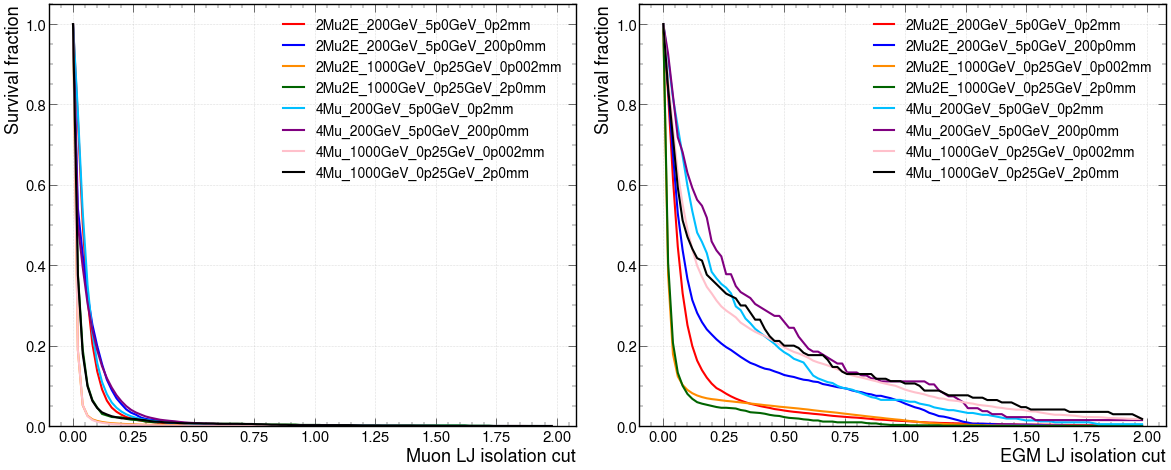

In [10]:
plt.figure(figsize=(24, 10))

# ---- MUON ----
plt.subplot(1, 2, 1)
for i, sample in enumerate(samples_sig):
    h_mu = out[sample]["hists"]["mu_lj_isolation"][channels[1], :]
    cuts, surv = survival_curve_from_hist_with_overflow(h_mu)
    plt.plot(cuts, surv, color=colors[i], linewidth=3, label=sample)

plt.xlabel("Muon LJ isolation cut")
plt.ylabel("Survival fraction")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc=1, prop={"size": 20})

# ---- EGM ----
plt.subplot(1, 2, 2)
for i, sample in enumerate(samples_sig):
    h_egm = out[sample]["hists"]["egm_lj_isolation"][channels[1], :]
    cuts, surv = survival_curve_from_hist_with_overflow(h_egm)
    plt.plot(cuts, surv, color=colors[i], linewidth=3, label=sample)

plt.xlabel("EGM LJ isolation cut")
plt.ylabel("Survival fraction")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc=1, prop={"size": 20})

plt.tight_layout()
plt.show()

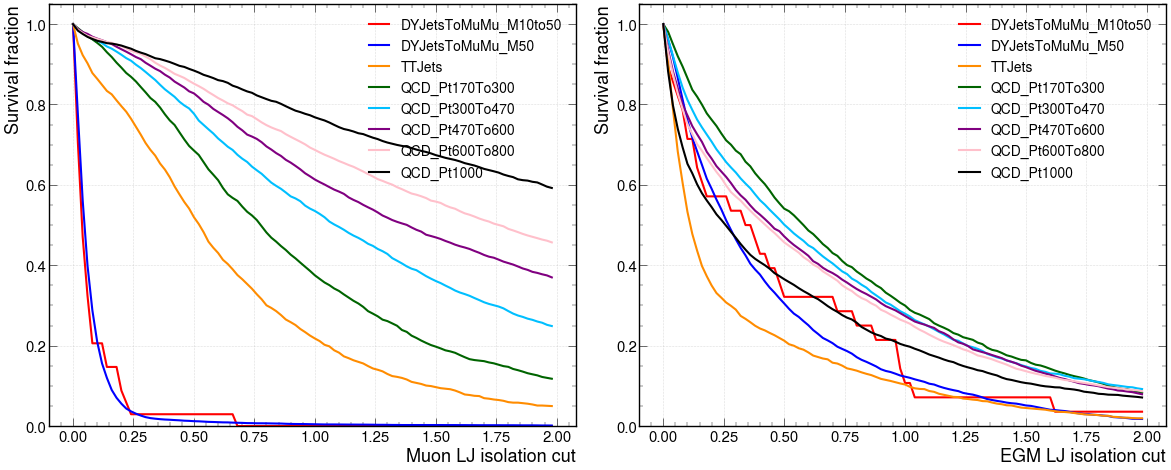

In [11]:
plt.figure(figsize=(24, 10))

# ---- MUON ----
plt.subplot(1, 2, 1)
for i, sample in enumerate(samples_bkg):
    h_mu = out[sample]["hists"]["mu_lj_isolation"][channels[1], :]
    cuts, surv = survival_curve_from_hist_with_overflow(h_mu)
    plt.plot(cuts, surv, color=colors[i], linewidth=3, label=sample)

plt.xlabel("Muon LJ isolation cut")
plt.ylabel("Survival fraction")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc=1, prop={"size": 20})

# ---- EGM ----
plt.subplot(1, 2, 2)
for i, sample in enumerate(samples_bkg):
    h_egm = out[sample]["hists"]["egm_lj_isolation"][channels[1], :]
    cuts, surv = survival_curve_from_hist_with_overflow(h_egm)
    plt.plot(cuts, surv, color=colors[i], linewidth=3, label=sample)

plt.xlabel("EGM LJ isolation cut")
plt.ylabel("Survival fraction")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc=1, prop={"size": 20})

plt.tight_layout()
plt.show()

In [23]:
def sum_bgs_hist(bgs_list, histogram_name, channel_name):
    """
    Sum histograms for a list of backgrounds.
    """
    summed_hist = None
    
    for x in bgs_list:
        # print(x)
        hist = out[x]["hists"][histogram_name][channel_name, :]
        
        if summed_hist is None:
            summed_hist = hist.copy()
        else:
            summed_hist += hist
    
    return summed_hist

In [33]:
QCD = [   
    # "QCD_Pt120To170",
    "QCD_Pt170To300",
    "QCD_Pt300To470",
    "QCD_Pt470To600",
    "QCD_Pt600To800",
    # "QCD_Pt800To1000",
    "QCD_Pt1000",
]

DY = [
    "DYJetsToMuMu_M10to50", 
    "DYJetsToMuMu_M50", 
]

TT = ["TTJets"]

In [54]:
sum_bg_qcd_mu = sum_bgs_hist(QCD, "mu_lj_isolation", "base_CC")
sum_bg_dy_mu = sum_bgs_hist(DY, "mu_lj_isolation", "base_CC")
sum_bg_tt_mu = sum_bgs_hist(TT, "mu_lj_isolation", "base_CC")

sum_bg_qcd_e = sum_bgs_hist(QCD, "egm_lj_isolation", "base_CC")
sum_bg_dy_e = sum_bgs_hist(DY, "egm_lj_isolation", "base_CC")
sum_bg_tt_e = sum_bgs_hist(TT, "egm_lj_isolation", "base_CC")

In [ ]:
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_200GeV_5p0GeV_200p0mm",
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_0p25GeV_2p0mm",

(0.0001, 1000000000.0)

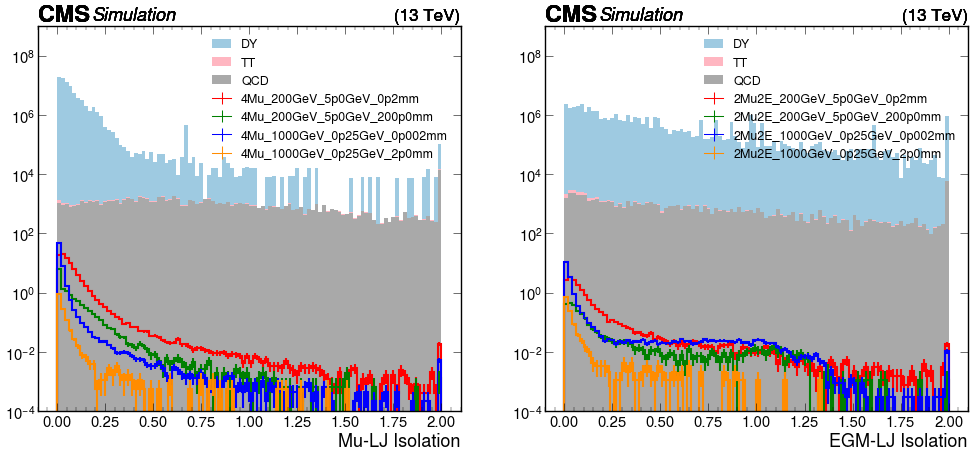

In [63]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
utilities.plot([sum_bg_qcd_mu, sum_bg_tt_mu, sum_bg_dy_mu], density=False, histtype="fill", color=["#A9A9A9","#FFB6C1","#9ECAE1"], label=["QCD", "TT", "DY"], stack=True, yerr=True, linewidth=1)
utilities.plot(out["4Mu_200GeV_5p0GeV_0p2mm"]["hists"]["mu_lj_isolation"][channels[1], :], density=False, color=['r'], yerr=True, linewidth=3, label='4Mu_200GeV_5p0GeV_0p2mm')
utilities.plot(out["4Mu_200GeV_5p0GeV_200p0mm"]["hists"]["mu_lj_isolation"][channels[1], :], density=False, color=['g'], yerr=True, linewidth=3, label='4Mu_200GeV_5p0GeV_200p0mm')
utilities.plot(out["4Mu_1000GeV_0p25GeV_0p002mm"]["hists"]["mu_lj_isolation"][channels[1], :], density=False, color=['b'], yerr=True, linewidth=3, label='4Mu_1000GeV_0p25GeV_0p002mm')
utilities.plot(out["4Mu_1000GeV_0p25GeV_2p0mm"]["hists"]["mu_lj_isolation"][channels[1], :], density=False, color=['darkorange'], yerr=True, linewidth=3, label='4Mu_1000GeV_0p25GeV_2p0mm')
plt.legend(loc='upper right', fontsize=18)
plt.yscale("log")
plt.ylim(.0001,10E8)

plt.subplot(1,2,2)
utilities.plot([sum_bg_qcd_e, sum_bg_tt_e, sum_bg_dy_e], density=False, histtype="fill", color=["#A9A9A9","#FFB6C1","#9ECAE1"], label=["QCD", "TT", "DY"], stack=True, yerr=True, linewidth=1)
utilities.plot(out["2Mu2E_200GeV_5p0GeV_0p2mm"]["hists"]["egm_lj_isolation"][channels[1], :], density=False, color=['r'], yerr=True, linewidth=3, label='2Mu2E_200GeV_5p0GeV_0p2mm')
utilities.plot(out["2Mu2E_200GeV_5p0GeV_200p0mm"]["hists"]["egm_lj_isolation"][channels[1], :], density=False, color=['g'], yerr=True, linewidth=3, label='2Mu2E_200GeV_5p0GeV_200p0mm')
utilities.plot(out["2Mu2E_1000GeV_0p25GeV_0p002mm"]["hists"]["egm_lj_isolation"][channels[1], :], density=False, color=['b'], yerr=True, linewidth=3, label='2Mu2E_1000GeV_0p25GeV_0p002mm')
utilities.plot(out["2Mu2E_1000GeV_0p25GeV_2p0mm"]["hists"]["egm_lj_isolation"][channels[1], :], density=False, color=['darkorange'], yerr=True, linewidth=3, label='2Mu2E_1000GeV_0p25GeV_2p0mm')
plt.legend(loc='upper right', fontsize=18)
plt.yscale("log")
plt.ylim(.0001,10E8)

(0.0001, 1000000000.0)

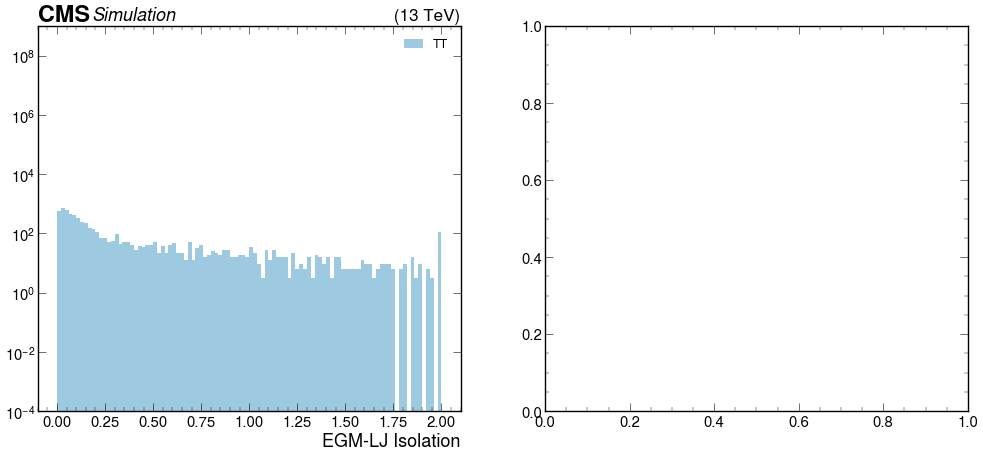

In [62]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
utilities.plot([sum_bg_tt_e], density=False, histtype="fill", color=["#9ECAE1"], label=["TT"], stack=True, yerr=True, linewidth=1)
plt.legend(loc='upper right', fontsize=18)
plt.yscale("log")
plt.ylim(.0001,10E8)